In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy import signal
import pandas as pd
import lasio
import matplotlib.pyplot as plt

#modulos internos
import os,sys
sys.path.append('../modulos')
import imod
from imod import Statistical
from graficador import plotagem as plm2



#Configurando figura e o rc parameters
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (20,5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 18)

#Pacote de incertezas
from uncertainties import ufloat
from uncertainties.umath import *
import statistics



#Plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

from os import getcwd, listdir
from os.path import isfile, join 

In [5]:
#Simulação COT Achilles:
cab = ['Depth','RHOB','Prod_1','Sed','PaleoBAT','Frac_areia','Idades','F_carbono','COma','rCO','qCO','COte','COT']
datasimu = pd.read_csv('../antigo/ESS-138/Resultados/Simulacao_COT_138/static/Simulacao_COT_7.txt', sep='\\s+',
                       skiprows=44, names = cab, usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12))
df_a = pd.DataFrame(datasimu)
z_a = df_a[df_a.columns[0]]#prof
COT_a = df_a[df_a.columns[12]]#COT
print(len(df_a))

6281


In [6]:
df_a

,Depth,RHOB,Prod_1,Sed,PaleoBAT,Frac_areia,Idades,F_carbono,COma,rCO,qCO,COte,COT
0,2446.49,0.705857,148.113213,7.469487,992.573690,95.783240,48.851513,1.107275,0.106035,0.222193,0.021084,0.253006,0.274089
1,2446.99,0.705857,148.111682,7.469481,992.601492,96.384560,48.858208,1.107219,0.106035,0.222182,0.018077,0.216926,0.235004
2,2447.49,0.705857,148.110151,7.469482,992.629294,96.207923,48.864902,1.107163,0.106035,0.222171,0.018960,0.227525,0.246485
3,2447.99,0.705857,148.108620,7.469485,992.657096,95.673588,48.871595,1.107107,0.106035,0.222160,0.021632,0.259585,0.281217
4,2448.49,0.705857,148.107089,7.469479,992.684899,95.552952,48.878289,1.107051,0.106035,0.222149,0.022235,0.266823,0.289058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,5584.49,2.396497,174.166758,9.077913,639.894432,65.122104,92.694492,2.445104,0.114184,0.128169,0.174389,1.302442,1.476832
6277,5584.99,2.396497,174.166758,9.077913,639.894432,65.122104,92.694492,2.445104,0.114184,0.128169,0.174389,1.302442,1.476832
6278,5585.49,2.396497,174.166758,9.077913,639.894432,65.122104,92.694492,2.445104,0.114184,0.128169,0.174389,1.302442,1.476832
6279,5585.99,2.396497,174.166758,9.077913,639.894432,65.122104,92.694492,2.445104,0.114184,0.128169,0.174389,1.302442,1.476832


In [7]:
#Simulação COT Geoquímmica:
cab = ['Depth','COT']
datasimu = pd.read_csv('../entradas/COT_geoq/4ESS138.txt', sep='\\s+',
                       skiprows=1, names = cab, usecols=(0,1))
df_q = pd.DataFrame(datasimu)
z_q = df_q[df_q.columns[0]]#prof
COT_q = df_q[df_q.columns[1]]#COT
print(len(df_q),df_q)

8     Depth   COT
0  5283.0  1.41
1  5445.0  1.36
2  5463.0  1.39
3  5481.0  1.69
4  5499.0  1.79
5  5517.0  2.00
6  5535.0  2.08
7  5553.0  1.87


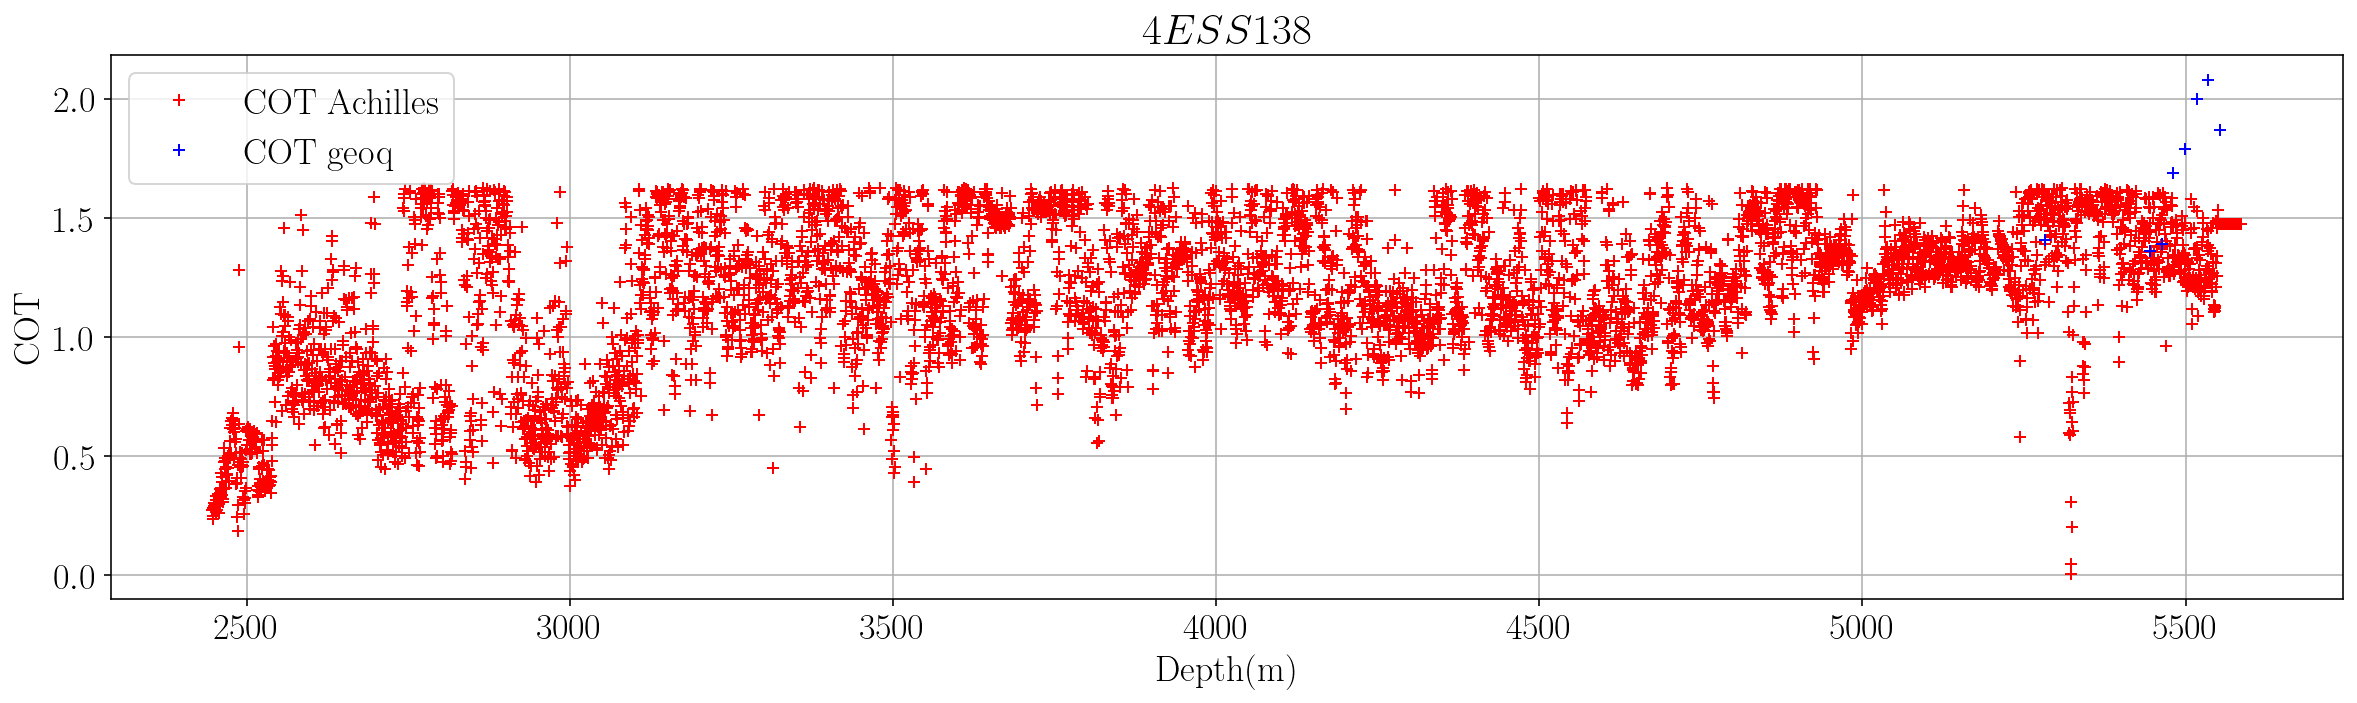

In [8]:
plt.plot( z_a, COT_a,'r+',z_q,COT_q,'b+')
plt.grid()
plt.legend(['COT Achilles','COT geoq'], loc='best')
plt.xlabel('Depth(m)')
plt.ylabel('COT')
plt.title("$4ESS138$")
plt.savefig('../imagens/achillesXgeoq_4ESS138.png')
plt.show()

In [9]:
#II - filtragem visual: selecao de um alvo especifico idade ou grupo
topo =5283.0
base = 5553.0
df_a=df_a[(df_a['Depth'] >= topo) & (df_a['Depth'] <= base)] # alvo! 

In [10]:
z_a = df_a[df_a.columns[0]]#prof
COT_a = df_a[df_a.columns[12]]#COT

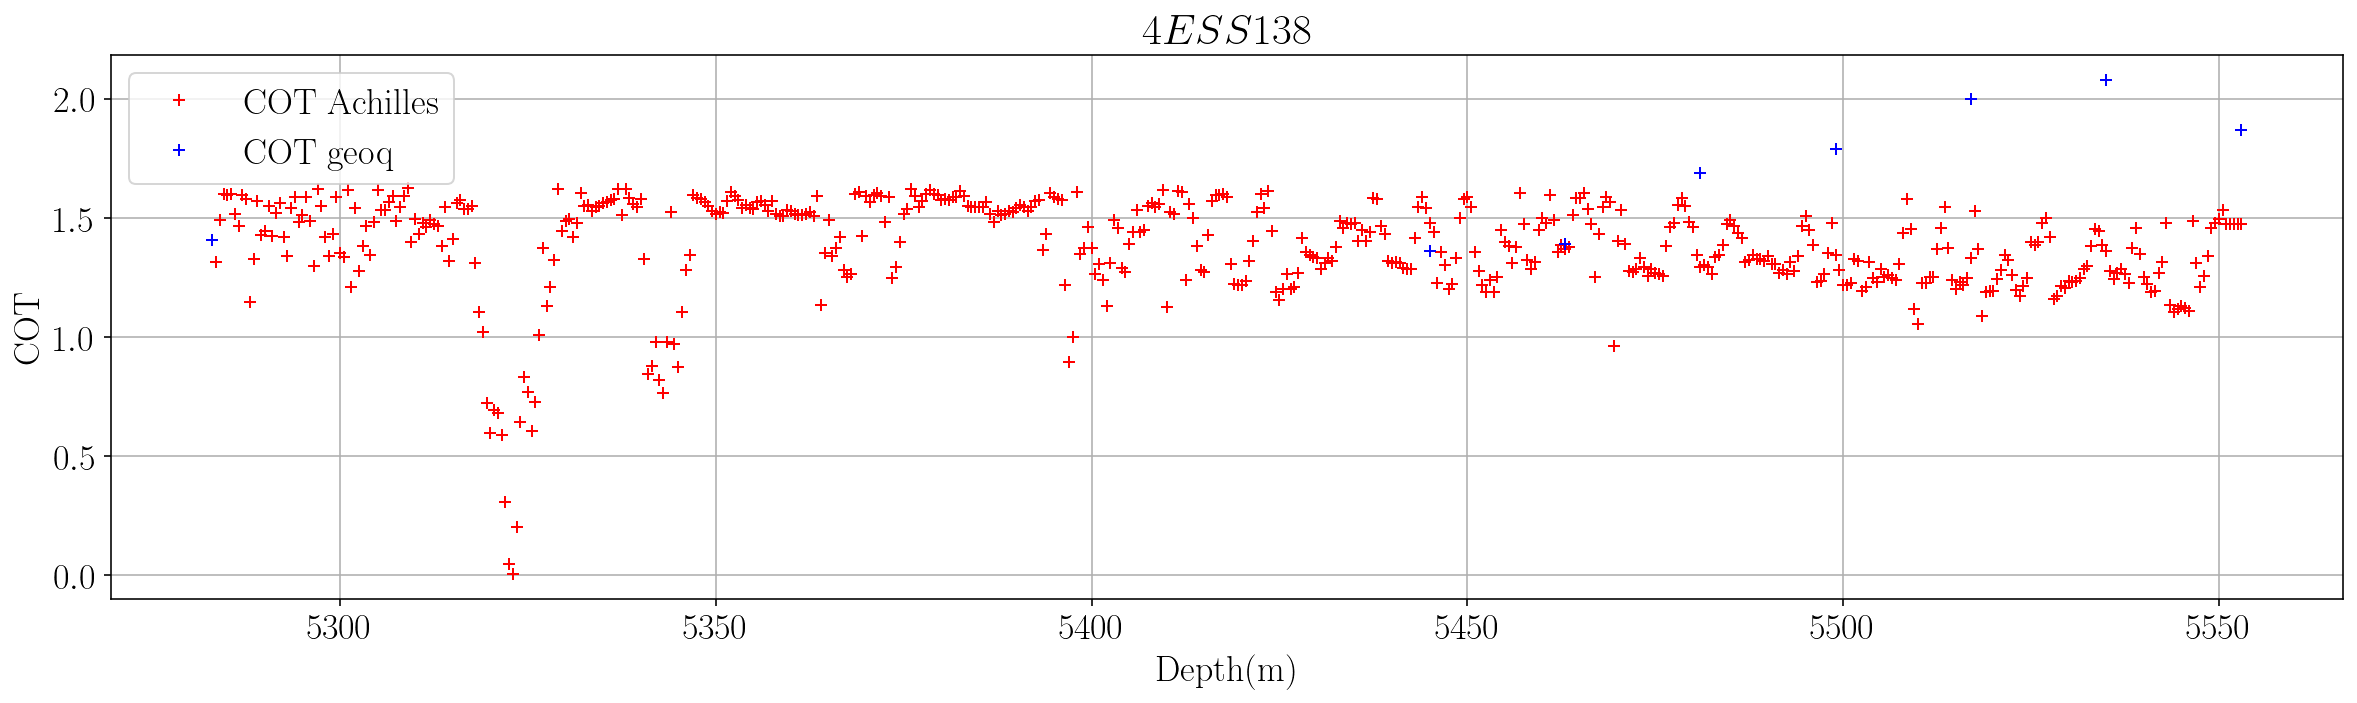

In [11]:
plt.plot( z_a, COT_a,'r+',z_q,COT_q,'b+')
plt.grid()
plt.legend(['COT Achilles','COT geoq'], loc='best')
plt.xlabel('Depth(m)')
plt.ylabel('COT')
plt.title("$4ESS138$")
plt.savefig('../imagens/achillesXgeoq_4ESS138_alvo.png')
plt.show()

In [18]:
# Gráfico interativo Plotly
xaxis = go.layout.XAxis(title="Depth")
yaxis = go.layout.YAxis(title="COT ")

fig = go.Figure(layout=go.Layout(title="$4ESS138$", xaxis=xaxis, yaxis=yaxis))
fig.add_trace(go.Scatter(x=z_a, y=COT_a, mode="markers"))
fig.add_trace(go.Scatter(x=z_q, y=COT_q, mode="markers"))
fig.show()

In [13]:

df_q['COT_achilles']=np.zeros(len((df_q['COT'])))
print(df_q,len(z_a),len(z_q))

    Depth   COT  COT_achilles
0  5283.0  1.41           0.0
1  5445.0  1.36           0.0
2  5463.0  1.39           0.0
3  5481.0  1.69           0.0
4  5499.0  1.79           0.0
5  5517.0  2.00           0.0
6  5535.0  2.08           0.0
7  5553.0  1.87           0.0 540 8


In [16]:
z_a=np.array(z_a)
COT_a=np.array(COT_a)
COT_q=np.array(COT_q)
COT_aa = []
#Cria coluna de códigos no AGP
for i in range(np.size(z_a)):
    for j in range(np.size(z_q)):
        #print(z_q[j])
        if z_a[i] == z_q[j]:
            #COT_aa.append(COT_a[j])
            COT_aa = COT_a[j]
            print(COT_aa)
            
print(COT_aa,np.size(COT_aa))           

[] 0


In [17]:
COt_a= pd.DataFrame(COT_aa)
COt_a


""


In [158]:
df_q['COT_achilles']=COt_a

In [151]:
df_q

,Depth,COT,COT_achilles
0,4317.0,0.671,0.0
1,4347.0,0.711,0.0
2,4407.0,0.694,0.0
3,4443.0,0.630,0.0
4,4473.0,0.720,0.0
...,...,...,...
71,5013.0,2.660,0.0
72,5016.0,2.260,0.0
73,5019.0,2.130,0.0
74,5022.0,2.140,0.0
